In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")

In [32]:
df = pd.read_csv("train.csv")
df_orig = df.copy()
df_test = pd.read_csv("test.csv")

In [33]:
df.select_dtypes(["object"]).describe()

,species
count,990
unique,99
top,Acer_Opalus
freq,10


In [34]:
df = df.drop(columns=["id"])
df_test = df_test.drop(columns=["id"])

In [5]:
df["species"].value_counts().sort_values(ascending=True)

Acer_Opalus               10
Tilia_Tomentosa           10
Quercus_Variabilis        10
Magnolia_Salicifolia      10
Quercus_Canariensis       10
                          ..
Salix_Intergra            10
Quercus_Infectoria_sub    10
Quercus_Castaneifolia     10
Quercus_x_Turneri         10
Sorbus_Aria               10
Name: species, Length: 99, dtype: int64

In [6]:
len(set(df["species"].values))

99

In [7]:
# sns.heatmap(df.corr(), annot = True, square = True, mask = matrix, linewidths = 0.5, annot_kws = {'size': 14})
# plt.figure(figsize=(15, 15))
# sns.heatmap(df.corr(), annot = True, square = True, linewidths = 0.5, annot_kws = {'size': 14})

In [8]:
# from patsy import dmatrices

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Regress carat against all other features

# y, X = dmatrices('carat ~ cut + color + clarity + x + y + z', df, return_type = 'dataframe')

# # For each X, calculate VIF and save in dataframe

# VIF = pd.DataFrame()

# VIF['Features'] = X.columns

# VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(VIF)


In [9]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 193 columns):
 #    Column     Dtype  
---   ------     -----  
 0    species    object 
 1    margin1    float64
 2    margin2    float64
 3    margin3    float64
 4    margin4    float64
 5    margin5    float64
 6    margin6    float64
 7    margin7    float64
 8    margin8    float64
 9    margin9    float64
 10   margin10   float64
 11   margin11   float64
 12   margin12   float64
 13   margin13   float64
 14   margin14   float64
 15   margin15   float64
 16   margin16   float64
 17   margin17   float64
 18   margin18   float64
 19   margin19   float64
 20   margin20   float64
 21   margin21   float64
 22   margin22   float64
 23   margin23   float64
 24   margin24   float64
 25   margin25   float64
 26   margin26   float64
 27   margin27   float64
 28   margin28   float64
 29   margin29   float64
 30   margin30   float64
 31   margin31   float64
 32   margin32   float64
 33   margin33   fl

In [10]:
df.isna().sum().sort_values(ascending=True)

species      0
shape58      0
shape59      0
shape60      0
shape61      0
            ..
shape3       0
shape4       0
shape5       0
shape31      0
texture64    0
Length: 193, dtype: int64

In [11]:
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
X =  df.drop(columns=["species"])
encoder = LabelEncoder()
y = encoder.fit_transform(df["species"])

In [13]:
y = to_categorical(y)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [16]:
model = Sequential()
model.add(Dense(1024, activation= "relu",input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(y_train.shape[1], activation= "softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              197632    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 99)                3267      
                                                                 
Total params: 760,611
Trainable params: 760,611
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
X.shape

(990, 192)

In [20]:
model.fit(X_train, y_train,  epochs=100, batch_size= 99, verbose=0)

<AxesSubplot:>

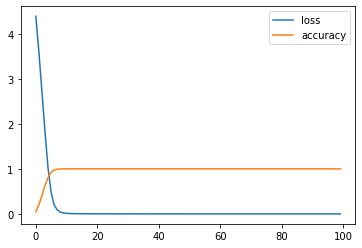

In [21]:
pd.DataFrame(model.history.history).plot()

In [22]:
df = df.drop(columns=["shape10"])

In [35]:
df_corr = df.corr()
high_corr = df_corr[(df_corr > .99) & ~(df_corr == 1)]

In [36]:
# df_corr

In [37]:
high_corr.columns

Index(['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9', 'margin10',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=192)

In [38]:
# df = df.drop(columns= ["shape10"])

In [40]:
feature_corr

{'shape9': ['shape10'],
 'shape10': ['shape9', 'shape11'],
 'shape11': ['shape10', 'shape12'],
 'shape12': ['shape11', 'shape13'],
 'shape13': ['shape12', 'shape14'],
 'shape14': ['shape13', 'shape15'],
 'shape15': ['shape14', 'shape16'],
 'shape16': ['shape15', 'shape17'],
 'shape17': ['shape16', 'shape18'],
 'shape18': ['shape17', 'shape19'],
 'shape19': ['shape18', 'shape20'],
 'shape20': ['shape19', 'shape21'],
 'shape21': ['shape20', 'shape22'],
 'shape22': ['shape21', 'shape23'],
 'shape23': ['shape22'],
 'shape42': ['shape43'],
 'shape43': ['shape42', 'shape44'],
 'shape44': ['shape43', 'shape45'],
 'shape45': ['shape44', 'shape46'],
 'shape46': ['shape45', 'shape47'],
 'shape47': ['shape46', 'shape48'],
 'shape48': ['shape47', 'shape49'],
 'shape49': ['shape48', 'shape50'],
 'shape50': ['shape49', 'shape51'],
 'shape51': ['shape50', 'shape52'],
 'shape52': ['shape51', 'shape53'],
 'shape53': ['shape52', 'shape54'],
 'shape54': ['shape53']}

In [39]:
feature_corr = {}
for col in high_corr.columns:
    col_high_corr = high_corr[col][high_corr[col] > 0]
    for index in col_high_corr.index:
        feature_corr.update({col: feature_corr.get(col, []) + [index]})
        # plt.figure()
        # sns.scatterplot(x= index, y= col, data= df)
        # plt.xlabel(index)
        # plt.ylabel(col)
        # plt.title(f"corr between {col} & {index} = {col_high_corr[index]}")

In [ ]:
df = df.drop(columns=["shape1", "shape9"])